In [73]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [74]:
#reading the CSV file
x = pd.read_csv("sms-spam.csv")

#displaying the dataframe
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [75]:
#dataset size - 5572 rows x 5 columns
x.shape

(5572, 5)

## Data Cleaning

In [76]:
#printing the concise summary of the dataset
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [77]:
#column 2, 3, 4 have majority missing values, so it is better to drop them.
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

#displaying the edited dataframe
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [78]:
#renaming the column names to a better and meaningful column name
x.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True)

#displaying the edited dataframe
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [79]:
#result has categorical labels, we need to convert it into numerical values - enbcoding
#for that we will be using 'LabelEncoder' from sklearn

In [80]:
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])

#displaying the edited dataframe
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
#so 0 means no SPAM, 1 means SPAM

In [82]:
#check if there is any NULL value
x.isnull().sum()

result    0
input     0
dtype: int64

In [83]:
#the dataset has NO null values, so don't need to handle them

In [84]:
#check if there is any DUPLICATE values
x.duplicated().sum()

403

In [85]:
#the dataset has DUPLICATE values, so we will have to REMOVE them
x = x.drop_duplicates(keep='first')

#displaying the edited dataframe
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [86]:
#rows reduced from 5572 to 5169 after DUPLICATED values have been deleted

## EDA - Exploratory Data Analysis

In [87]:
#the given problem is a classification problem, so we need to understand the data first by performing EDA.
#the dataset has only 2 columns, so less analysis required.

In [88]:
#checking the number of SPAM vs not SPAM messages
x['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [89]:
#out of 5169 datavalues, 653 are SPAM

In [90]:
653*100.0/5169

12.633004449603405

In [91]:
#12.63% is SPAM and 87.37% is not SPAM

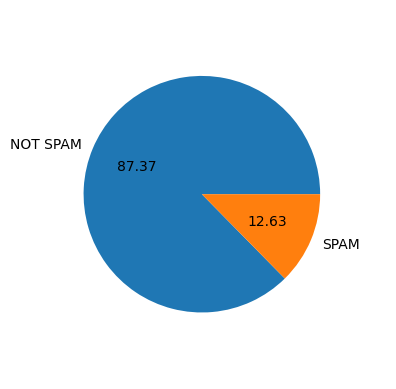

In [92]:
#for better representation, we can use PIE CHART to represent it.
#PIE CHARTS can be created using matplotlib library

plt.pie(x['result'].value_counts(),  labels = ['NOT SPAM', 'SPAM'], autopct = '%0.2f', radius = 0.8)
plt.show()

In [93]:
#hence, highly IMBALANCED DATA

In [94]:
#now we will be analysing the number of alphabets/words/sentences being used in the TEXT
#for this, will create 3 new columns: (1) no. of characters (2) no. of words (3) no. of sentences in SMS

#using 'nltk' library for this. 
#Natural Language Toolkit for text processing 
#(pip install nltk)

In [95]:
#downloading the dependencies 
#punkt package includes pre-trained models for tokenizing text in many languages

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     AERO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
#creating a new column with count of characters
x['countCharacters'] = x['input'].apply(len)

#creating a new column with count of words
x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences

C:\Users\HP AERO\AppData\Local\Temp\ipykernel_746904\3785843795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countCharacters'] = x['input'].apply(len)
C:\Users\HP AERO\AppData\Local\Temp\ipykernel_746904\3785843795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
C:\Users\HP AERO\AppData\Local\Temp\ipykernel_746904\3785843795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [97]:
#displaying the edited dataframe with the 3 new columns added
x.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [98]:
#extracting the 5 number summary of the 3 new column values
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [99]:
#for not SPAM
x[x['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [100]:
#for SPAM
x[x['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

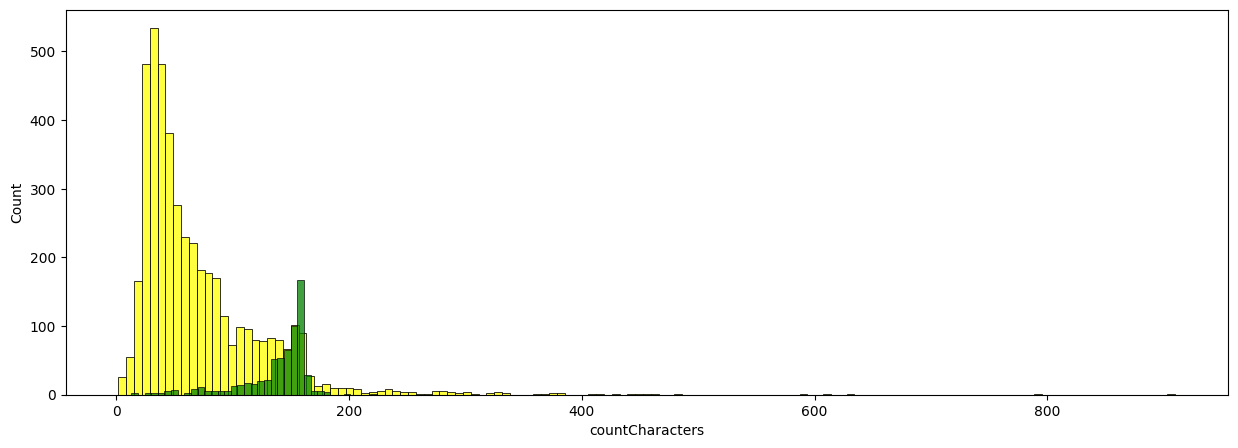

In [101]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countCharacters'], color = "yellow") #ham
sns.histplot(x[x['result'] == 1]['countCharacters'], color = "green") #spam

#green -> SPAM, yellow -> not SPAM

<Axes: xlabel='countWords', ylabel='Count'>

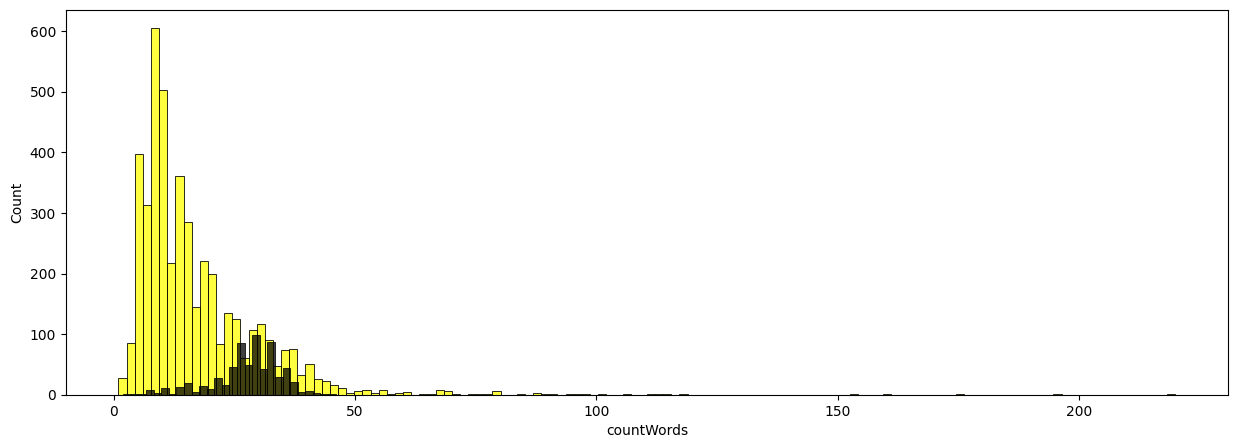

In [102]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countWords'], color = "black")

#black -> SPAM, yellow -> not SPAM

In [103]:
#observation : SPAM messages have more no of characters used, mean is 137.89 for SPAM and 70.45 for not SPAM
#so it means that spam have more characters as compared to ham

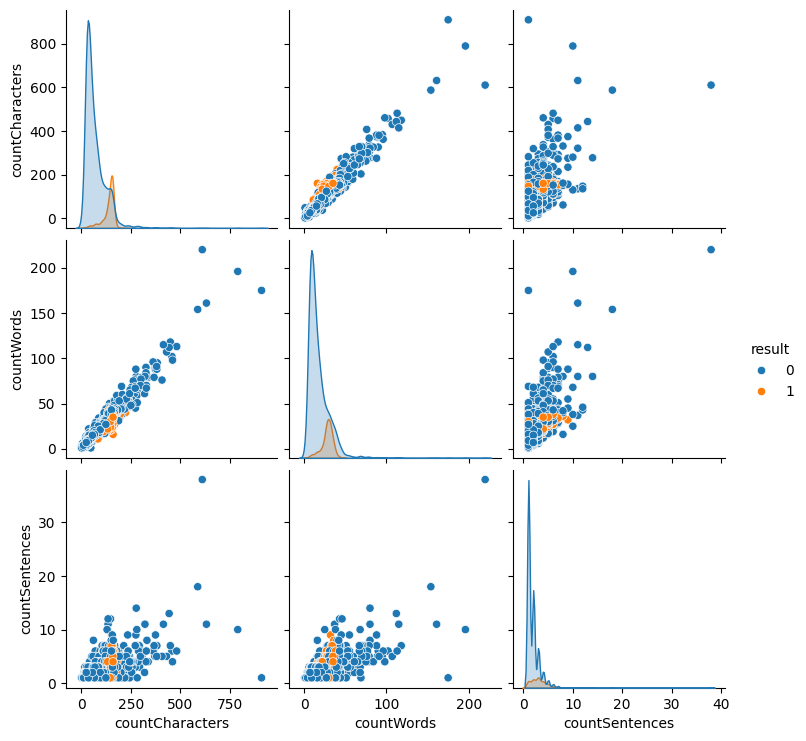

In [104]:
#finding relationship between the columns we use pairplot a seaborn alias
sns.pairplot(x, hue='result')
#here in the diagram we have 0-> ham 1->spam

## Data Preprocessing

In [105]:
#peforming preprocessing such as tokenization (converting the text into tokens or words), removing special characters,
#removing stopwords and punctuation and lastly stemming the data.
#also, converting to lower case first as there is no point of considering HELLO & helllo as unique and then pre-processing the data

In [106]:
#downloading the package which contains the stopwords #st0pwords-> words like a an the which are of no use here so first we download all stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     AERO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
stopwords.words("English") #all teh stopwords of our dataset is printed using this
#also we can see that we have no use of thwse stopwords, they are completely useless for us
#so we remove them

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [108]:
#conversion to lowecase using a self made function called transfrom
def transform_text(text) :
    text =text.lower()  #changing all to lowercase bcz thre is no point in considering Hello and hello as 2 different 
    words= nltk.word_tokenize(text) #dividing sentense into words
    print(words)

In [109]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words("English")
def transform_text(text) :
    usefull_words=[]
    text =text.lower()  #changing all to lowercase bcz thre is no point in considering Hello and hello as 2 different 
    words= nltk.word_tokenize(text) #dividing sentense into words
    for word in words:
        if word not in stopwords_list and word not in string.punctuation: #ingore stopwords and punctuation signs

            usefull_words.append(word)
    
    text= " ".join(usefull_words)
            
    #here some lines are added to above function 
    #so we create an array for usefull_words (usefull= all words - stopwords)
    #and we search in the all the words
    #if stopwords come ignore and also unwanted punctuation signs  but if not add it to array of usefulll words



    
    #stemming the data using 'PorterStemmer' algorithm.
    #The Porter Stemming Algorithm is a widely used text preprocessing technique in 
    # Natural Language Processing (NLP). It reduces words to their root or base form, 
    # called the "stem," by systematically removing suffixes. The goal is to group similar
    #  words together, such as "running," "runner," and "ran," to their stem "run."
    
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = []
    for word in nltk.word_tokenize(text):
        stemmed.append(ps.stem(word))
    
    return " ".join(stemmed)
#EX->"Hello, world! This is a running example of a PorterStemmer in action
#O/P-> hello world run exampl porterstem action


In [110]:
#function for transforming the text is ready

In [111]:
#will create a new column to store the transformed text -> 'processed'
x['processed'] = x['input'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
x.head()

C:\Users\HP AERO\AppData\Local\Temp\ipykernel_746904\2432381459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['processed'] = x['input'].apply(transform_text)


,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [112]:
x

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì_ b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood ... suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy someth els ...


In [113]:
if 'processed' in x.columns:
    print("Column 'processed' exists.")
else:
    print("Column 'processed' does not exist.")


Column 'processed' exists.


In [114]:
#will be creating word cloud for data visualization to display the most frequently occurring words in the processed dataset.
#using 'WordCloud' class

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [115]:
if 'processed' in x.columns:
    print("Column 'processed' exists.")
else:
    print("Column 'processed' does not exist.")


Column 'processed' exists.


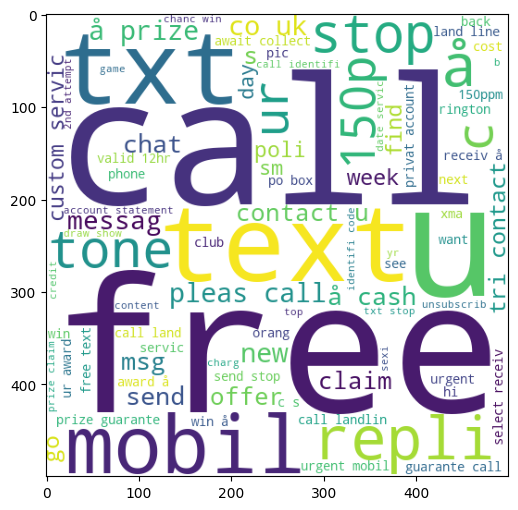

In [116]:
#creating a wordcloud(most commonly use words) for the SPAM messages
spamWC = wc.generate(x[x['result'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

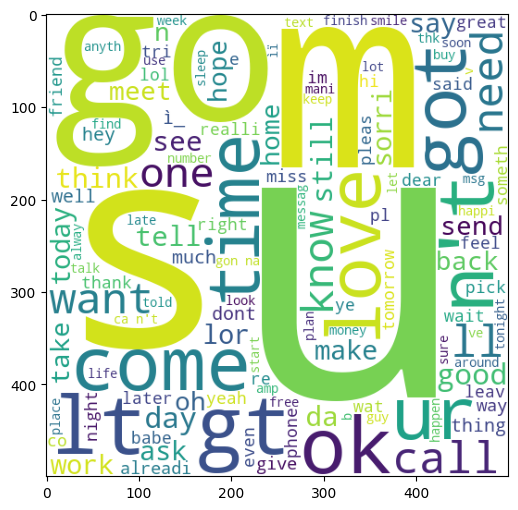

In [117]:
#creating a wordcloud(most commonly used words) for the not SPAM messages
spamWC = wc.generate(x[x['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [118]:
#extracting the most common words used in both SPAM and not SPAM messages->

#extracting all the words used in SPAM messages
spamWords = list()

for msg in x[x['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords
#means that when these words exist in the dataset we will consider it as spam

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 "'s",
 'appli',
 '08452810075over18',
 "'s",
 'freemsg',
 'hey',
 'darl',
 "'s",
 '3',
 'week',
 "'s",
 'word',
 'back',
 "'d",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£1.50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20,000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575.',
 'cost',
 '150p/day',
 '6day',
 '16+',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'w

In [119]:
#to count the frequency of the spammed words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ("'s", 59),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35)]

In [120]:
#converting this  to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

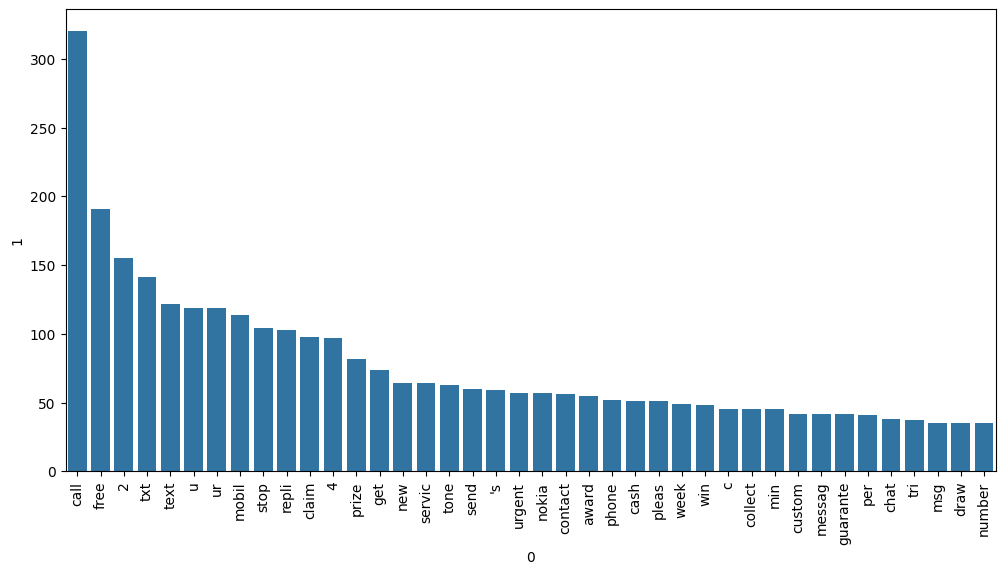

In [121]:
#plotting a bar plot of the mostCommonSPAM dataframe(words)
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [122]:
#words like 'CALL', 'FREE', '2', 'TXT', 'TEXT', 'UR', 'MOBIL' are the most common words in SPAM texts

## Model Building

In [123]:
#NaiveBayes classifier works BEST on textual data, so will firstly perform it on the dataset.

In [124]:
#we need to give numerical inputs to the classifier model, so will have to convert the 'processed' column into vectors.
#using 'bag of words'

In [125]:
#CountVectorizer is a feature extraction technique provided by scikit-learn in Python, primarily used for 
# transforming a collection of text documents into a matrix of token counts.
#  It is widely used for text preprocessing, particularly for natural language processing (NLP) tasks 

#CountVectorizer converts a collection of text documents into a matrix (also known as a "bag-of-words" representation) 
# where each row represents a document and each column represents a unique word (token) in the entire
# corpus. The values in the matrix represent the frequency (count) of each word in the corresponding document.

In [126]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [127]:
#transforming the data of processed column to vectorise it
X = cv.fit_transform(x['processed']).toarray()

#printing size of X
X.shape
#5169 rows 6708 cols after executing

(5169, 7376)

In [128]:
#storing the values of the 'result' column
#conversion into arrays of 0s &  1s
y = x['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [129]:
#splitting the training and testing dataset to train and test
#20% test data 80% train data
#randrom state means random selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [130]:
#creating the objects for the model TECHNIUES
gnb = GaussianNB() 
mnb = MultinomialNB()
bnb = BernoulliNB()

In [131]:
#training the dataset for GaussianNB 
#fitting is training
#prediction and testing for accuracy confusion and precision
#We mainly focus on precision score
#the value is to be converted into % by multiplying by 100
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8733075435203095
[[784 115]
 [ 16 119]]
0.5085470085470085


In [132]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9758220502901354
[[882  17]
 [  8 127]]
0.8819444444444444


In [133]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9680851063829787
[[891   8]
 [ 25 110]]
0.9322033898305084


In [134]:
#we have to focus mainly on 'precision' value
#the max precision we got is 9.45% with 9.64% as accuracy which is in BERNOULLI 

In [135]:
#'TfidfVectorizer -> TfidfVectorizer is another text vectorization technique provided by scikit-learn.
#  It transforms a collection of text documents into a matrix of TF-IDF features. Unlike CountVectorizer, 
# which simply counts word frequencies, TfidfVectorizer uses TF-IDF (Term Frequency-Inverse Document Frequency)
#  to give a measure of the importance of each word in the document relative to the entire corpus.

#TfidfVectorizer is a powerful tool for converting text data into a numerical format while considering 
# the importance of each word in a given document relative to the entire corpus.

In [136]:
#using 'TfidfVectorizer' for vectorization after vectorization Again fpr training and repeating same process
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(x['processed']).toarray()

#storing the values of the 'result' column
y = x['result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [137]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[785 114]
 [ 19 116]]
0.5043478260869565


In [138]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[899   0]
 [ 42  93]]
1.0


In [139]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9680851063829787
[[891   8]
 [ 25 110]]
0.9322033898305084


In [140]:
#model is PREPARED.
#now we have to host the website, for that pipeling needs to be done
#the text which we will get, has to be transformed first, then vectorized and then apply the algorithm

In [141]:
#pickle-> pickle is a powerful tool for serializing and deserializing Python objects, especially for complex data types.

In [147]:
#we will pickle 2 files
import pickle #library to store the models
pickle.dump(cv,open('vectorizer.pkl','wb')) #uploading objects into the file (vectorizer.pkl) in wb mode(write binary data)
pickle.dump(mnb,open('model.pkl','wb')) #dumping the model into model.pkl file in wb mode

In [143]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Initializing the PorterStemmer
ps = PorterStemmer()

# Function to clean and preprocess text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)
    
    # Remove stopwords and punctuation
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

# Load the saved vectorizer and model
tk = pickle.load(open("vectorizer.pkl", 'rb'))
model = pickle.load(open("model.pkl", 'rb'))

# Streamlit app
st.title("SMS SPAM DETECTION MODEL")
st.write("Made by Anushka Ojha")

# User input text
message = st.text_area("Enter the message")

# When the button is pressed
if st.button("Predict"):
    # Transform the input text
    transformed_text = transform_text(message)
    
    # Vectorize the transformed text
    vectorized_text = tk.transform([transformed_text])
    
    # Make the prediction
    prediction = model.predict(vectorized_text)
    
    # Display the result
    if prediction == 1:
        st.write("This message is SPAM.")
    else:
        st.write("This message is NOT SPAM.")


[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     AERO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     AERO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-01-23 01:26:59.531 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 01:27:00.306 
  command:

    streamlit run c:\Users\HP AERO\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-23 01:27:00.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 01:27:00.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 01:27:00.306 Thread 'MainThread': missing ScriptRunContext! This w

In [144]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
